# L'irradiation solaire

In [1]:
# Importations classiques pour le tracé
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.go_offline(connected=False)
init_notebook_mode(connected=False)

Il est possible, d'un point de vue énergétique, de catégoriser l'énergie disponible sur Terre via trois origines: la Terre, le Soleil et la Lune. En effet, du soleil vient:
- la biomasse (photosynthèse)
- les énergies fossiles (photosynthèse puis raffinement)
- le vent (différences de températures, cellules convectives, etc.)
- l'hydroélectricité (cycle de l'eau, évaporation)

La Terre donne l'énergie géothermique, càd de l'énergie nucléaire issu de son noyau en fusion. Etant doné que l'uranium est présent sur Terre, on pourrait dire que l'énergie nucléaire par fission est d'origine terrestre. Alors que l'énergie nucléaire par fusion viendrait du big bang?

La Lune, ainsi que le Soleil, génère des forces de gravité. Ce qui fait bouger les océans, via les marées, d'où l'énergie marémotrice. 

L'irradiance solaire correspond à la puissance envoyée par le soleil, souvent exprimée en W/m². Le soleil envoie une énergie considérable sur Terre, mais peu dense: en effet, une approximation rapide au niveau du sol donnerait 1000 W/m², pour un beau jour d'été en France. Cette énergie thermique (rayonnement) est récupéré par les différents éléments terrestres puis condensée, stockée, .. Ce qui permet de la récupérer en brûlant du bois, par exemple, ou en stockant l'eau en haut des montagnes. L'énergie hydroéléctrique est bien plus dense que l'énergie solaire: en récupérant l'eau et en la mettant dans un barrage, en grimpant en hauteur, on peut stocker cette énergie.

L'irradiation solaire correspond à l'énergie arrivant sur une surface; elle est exprimée en Wh/m², c'est par définition l'intégrale au cours du temps de la puissance, ou encore l'irradiance.

## Représentation classique

### Théorie

Le rayonnement solaire sur un plan est généralement divisé en deux parties: 

- d'un côté le rayonnement diffus, très présent lors de passage de nuage. De manière simplifiée, ce rayonnement peut être supposé indépendant de la direction d'émission et du plan récepteur. 

- de l'autre côté, le rayonnement direct. Ce dernier dépend de l'orientation du plan vis-à-vis du soleil. Voir Efficacités optiques

Le rayonnement global, et donc l'énergie incidente sur le plan, est la somme des deux. 

### 

### Obtenir des valeurs

Le site internet [PVGIS](https://ec.europa.eu/jrc/en/pvgis) propose des données solaires en accès libres. Il donne accès à un outil de simulation de calculs photovoltaïques et à de nombreuses données météo.

Ces dernières peuvent se trouver dans l'onglet TMY (pour *Typical Meteorological Year*); ces données annuelles sont choisis sur plusieurs années pour obtenir des données les plus "représentatives statistiquement". En précisant un plan, il est possible d'obtenir des informations spécifiques à ce plan.



Latitude (decimal degrees): 32.940
Longitude (decimal degrees): 6.688
Elevation (m): 117.0


Les différentes données présentes sont données à la fin du fichier CSV.
* T2m: Température à 2m de haut - 2-m air temperature (degree Celsius)
* RH: humidité relative - relative humidity (%)
* G(h): irradiation globale sur le plan horizontal - Global irradiance on the horizontal plane (W/m2)
* Gb(n): irradiation direct sur un plan normal aux rayons du soleil - Beam/direct irradiance on a plane always normal to sun rays (W/m2)
* Gd(h): Irradiation diffuse sur le plan horizontal - Diffuse irradiance on the horizontal plane (W/m2)
* IR(h): Surface infrared (thermal) irradiance on a horizontal plane (W/m2)
* WS10m: 10-m total wind speed (m/s)
* WD10m: 10-m wind direction (0 = N
* SP: Surface (air) pressure (Pa)

In [1]:
from math import pi
degree=pi/180;
#il est nécessaire de modifier manuellement le csv afin d'enlever les quelques premières lignes qui 
# gênent à la lecture. De même, les quelques lignes de fin.
dfElOued=pd.read_csv('data/tmy_32.940_6.688_2007_2016.csv')
dfChambe=pd.read_csv('data/tmy_45.644_5.881_2007_2016.csv')
dfElOued['hour']=dfChambe['hour'] = [k%24 for k in range(0,8760)]
dfElOued.columns = "El_Oued_" + dfElOued.columns
dfChambe.columns = "Chambe_" + dfChambe.columns
latElOued=32.940*degree;
latChambe = 45.644 * degree;

NameError: name 'pd' is not defined

In [ ]:
dayPlot=140
toPlot=pd.concat([dfElOued[dayPlot*24:(dayPlot+1)*24],dfChambe[dayPlot*24:(dayPlot+1)*24]])
toPlot.iplot(x=[k for k in range(0,24)], y=['El_Oued_G(h)','Chambe_G(h)'])

## Les heures équivalentes

## Déterminer le rayonnement diffus à partir du rayonnement total et direct

In [34]:
dni=400;
G_horizontale=300;
day=37;
declin=solarDeclinationByDayNumber(day);
hour=9;
hourAngle=15*(hour-12)*3.14159/180;
lat=44*degree;
sunVec=solarVectorFromDeclinHour(declin,hourAngle,lat);
g_diffus = G_horizontale-dni*(sunVec.z)
print(g_diffus)

193.5489166745873


## L'absorption et le spectre solaire

Un corps noir émet une puissance rayonnante, proportionelle à sa température: $\sigma T^4$. $\sigma$ est la constante de Stefan-Boltzmann, valant $5.67 \times 10^{-8} \ W/K^4$ 

Plus précisément, un corps noir émet une énergie par longueur d'onde; plus précisément, la formule de Planck nous donne cette répartition par longueur d'onde:
$$
\phi_{\lambda} = \frac{2 \pi \times h \times c_0}{\lambda^5} \times \frac{1}{exp(\frac{h \dot c_0}{\lambda k_B T})-1}
$$

In [5]:
from math import pi,exp
def Planck(wave,temperature):
    h=6.62*pow(10,-34)
    c0 = 2.99 * pow(10,8)
    kB=1.380649 * pow(10,-23)
    lambd = wave*pow(10,-9) #à donner en nanomètres
    coef1= 2*pi*h*c0/pow(lambd,5)
    coef2= h*c0/(lambd*kB*temperature)
    return coef1/(exp(coef2)-1)

In [6]:
Planck(500,5900)

310904.94689185283

In [11]:
df=pd.DataFrame(data=[[20*k for k in range(10,500)]]).T
df.columns=["Wavelength(nm)"]
nPoint=len(df['Wavelength(nm)'])
df["10°C"]=[Planck(df["Wavelength(nm)"][k],10+273.15) for k in range(0,nPoint)]
df["200°C"]=[Planck(df["Wavelength(nm)"][k],200+273.15)  for k in range(0,nPoint)]
df["500°C"]=[Planck(df["Wavelength(nm)"][k],500+273.15)  for k in range(0,nPoint)]
df["5900°C"]= [Planck(df["Wavelength(nm)"][k],5900+273.15)  for k in range(0,nPoint)]

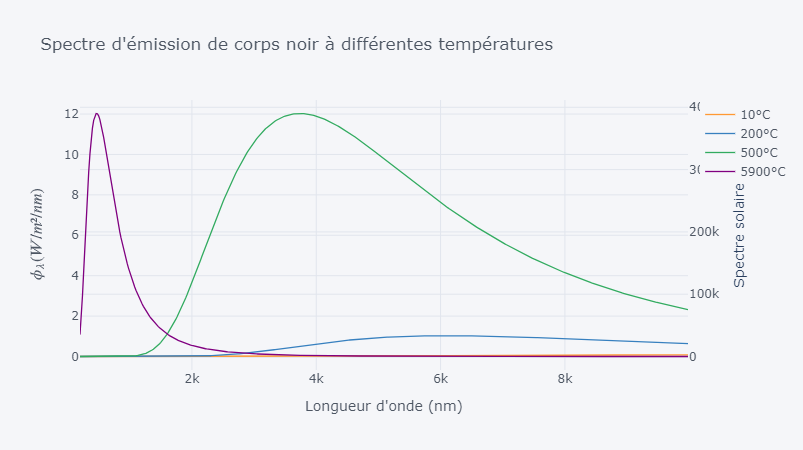

In [17]:
df.iplot(x="Wavelength(nm)", y=['10°C','200°C','500°C'], secondary_y='5900°C', xTitle='Longueur d\'onde (nm)', 
         yTitle ='$\phi_{\lambda} (W/m²/nm)$',secondary_y_title="Spectre solaire" , title="Spectre d'émission de corps noirs à différentes températures")